Libraries

In [8]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

Upload datasets

In [31]:
uploaded=files.upload()
yld1=pd.read_excel(io.BytesIO(uploaded['1_yield_data (2).xlsx']))
yld2=pd.read_excel(io.BytesIO(uploaded['yeild 2016-17.xlsx']))
yld3=pd.read_excel(io.BytesIO(uploaded['yeild 2017-18.xlsx']))
yld4=pd.read_excel(io.BytesIO(uploaded['yeild 2018-19.xlsx']))


Saving 1_yield_data (2).xlsx to 1_yield_data (2) (3).xlsx
Saving data.csv to data (2).csv
Saving yeild 2016-17.xlsx to yeild 2016-17 (3).xlsx
Saving yeild 2017-18.xlsx to yeild 2017-18 (3).xlsx
Saving yeild 2018-19.xlsx to yeild 2018-19 (3).xlsx


In [26]:
upload=files.upload()
final = pd.read_excel(io.BytesIO(upload['final.xlsx']))


Saving final.xlsx to final (4).xlsx


In [32]:
w=pd.read_csv(io.BytesIO(uploaded['data.csv']))
print(w)


        Unnamed: 0  Year           District  ... Humidity_max  Wind_min  Wind_max
0                0  2019           ADILABAD  ...        81.60       0.0       2.1
1                1  2019           ADILABAD  ...        78.30       0.0       7.1
2                2  2019           ADILABAD  ...        79.95       0.0       1.4
3                3  2019           ADILABAD  ...        94.80       0.0       1.1
4                4  2019           ADILABAD  ...        89.10       0.1       2.1
...            ...   ...                ...  ...          ...       ...       ...
554186      554186  2017  YADADHRI(BHONGIR)  ...        89.40       NaN      10.3
554187      554187  2017  YADADHRI(BHONGIR)  ...        61.00       NaN       5.4
554188      554188  2017  YADADHRI(BHONGIR)  ...        79.60       NaN       NaN
554189      554189  2017  YADADHRI(BHONGIR)  ...        82.70       NaN      12.2
554190      554190  2017  YADADHRI(BHONGIR)  ...        80.50       NaN       6.5

[554191 rows x 

PIE CHART

CROPS BEST FOR A GIVEN SEASON

Enter District : ADILABAD
Enter Season : kharif

GroundNut Average Yield :  834
Maize Average Yield :  3337
Bengal Gram Average Yield :  0


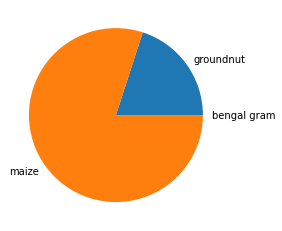

In [71]:
a=input("Enter District : ")
b=input("Enter Season : ")

district=yld1['District']==a
sea=yld1['Season']==b
crop1=yld1['Crop']=="groundnut"
crop2=yld1['Crop']=="maize"
crop3=yld1['Crop']=="bengal gram"
hc=yld1[sea & crop1 & district]
hv=yld1[sea & crop2 & district]
hk=yld1[sea & crop3 & district]
total = hc['Season_yield'].mean()
total1  = hv['Season_yield'].mean()
total2 = hk['Season_yield'].mean()

print("\nGroundNut Average Yield : ",int(total))
print("Maize Average Yield : ",int(total1))
print("Bengal Gram Average Yield : ",int(total2))

import matplotlib.pyplot as plt
sum=total+total1+total2
total=total*100/sum
total1=total1*100/sum
total2=total2*100/sum
y=np.array([total,total1,total2])
mylabels = ["groundnut", "maize", "bengal gram", ]

plt.pie(y, labels = mylabels)
plt.show() 

In [38]:
w1 = w.iloc[0:0,:].copy()
wdist = w['District']
wdist = wdist.drop_duplicates()
print(wdist)
  




0                     ADILABAD
18      KOMARAM BHEEM ASIFABAD
33                  MANCHERIAL
51                      NIRMAL
70                   NIZAMABAD
99                     JAGTIAL
117                 PEDDAPALLY
131    JAYASHANKAR BHUPALPALLY
142       BHADRADRI KOTHAGUDEM
165               MEHABOOBABAD
181                WARANGAL(R)
197                WARANGAL(U)
208                 KARIMNAGAR
224           RAJANNA SIRCILLA
237                  KAMAREDDY
259                 SANGAREDDY
285                      MEDAK
305                   SIDDIPET
328                    JANGAON
340          YADADHRI(BHONGIR)
357                    MEDCHAL
372                  HYDERABAD
388                RANGA REDDY
415                  VIKARABAD
433              MAHABOOBNAGAR
448                  JOGULAMBA
460                 WANAPARTHY
474               NAGARKURNOOL
494                   NALGONDA
525                   SURYAPET
548                    KHAMMAM
569                     MULUGU
578     

**DATA SET CLEANING** 

In [39]:
wsen = ["rabi","kharif"]
wyr = [2019,2018,2017]
countx=0
#print(wsen)
#print(wyr)
#print(wdist)
for i in range(33) :
  for j in range(3) :
    for k in range(2) :
      td = w.loc[(w['District']==wdist.iloc[i])  & (w['Year']== wyr[j])  & (w['crop_season']==wsen[k]) ]
      final.loc[countx] = [wdist.iloc[i],wyr[j],wsen[k],td.iloc[:,4].mean(),td.iloc[:,5].mean(),td.iloc[:,6].mean(),td.iloc[:,7].mean(),td.iloc[:,8].mean(),td.iloc[:,9].mean(),td.iloc[:,10].mean()]
      countx = countx + 1

print("___________________________________________________")
print(final)

___________________________________________________
       District  Year Season   ...  Avg_Hum_Max  Avg_Wind_Min  Avg_Wind_Max
0      ADILABAD  2019    rabi  ...    94.980191      0.040346      5.599180
1      ADILABAD  2019  kharif  ...    96.054697      0.510117      9.234327
2      ADILABAD  2018    rabi  ...    72.107745      0.087403     10.396759
3      ADILABAD  2018  kharif  ...    90.720935      0.530668     13.494354
4      ADILABAD  2017    rabi  ...    72.871629           NaN     10.095250
..          ...   ...     ...  ...          ...           ...           ...
193  NARAYANPET  2019  kharif  ...    94.066901      0.492387     11.604287
194  NARAYANPET  2018    rabi  ...          NaN           NaN           NaN
195  NARAYANPET  2018  kharif  ...          NaN           NaN           NaN
196  NARAYANPET  2017    rabi  ...    81.405347           NaN      9.076298
197  NARAYANPET  2017  kharif  ...    86.573097           NaN     10.750485

[198 rows x 10 columns]


In [40]:
print(yld2)
cv = final.sort_values(['Year','District'],ascending=['True','False'])
print(cv)

    SlNo       District Kharif  Rabi Total  Crop
0      1       ADILABAD   2580  3801  2608  Rice
1      2  KOMARAM BHEEM   2723  2573  2694   NaN
2      3     MANCHERIAL   3109  3705  3314   NaN
3      4         NIRMAL   3117  3025  3075   NaN
4      5      NIZAMABAD   3944  4160  4059   NaN
..   ...            ...    ...   ...   ...   ...
572   28   NAGARKURNOOL    599   599   599   NaN
573   29       NALGONDA    240   240   240   NaN
574   30       SURYAPET    240     0   240   NaN
575   31        KHAMMAM      0     0     0   NaN
576  NaN          TOTAL    590   584   590   NaN

[577 rows x 6 columns]
                 District  Year  ... Avg_Wind_Min  Avg_Wind_Max
4                ADILABAD  2017  ...          NaN     10.095250
5                ADILABAD  2017  ...          NaN     12.779020
52   BHADRADRI KOTHAGUDEM  2017  ...          NaN      8.906590
53   BHADRADRI KOTHAGUDEM  2017  ...          NaN     10.149588
130             HYDERABAD  2017  ...          NaN     10.046074
..  

# Random Forest Regression



In [11]:
upload=files.upload()
sf = pd.read_excel(io.BytesIO(upload['setdata.xlsx']))
sf

Saving setdata.xlsx to setdata (4).xlsx


,Unnamed: 0,District,Year,Season,Avg_Temp_min,Avg_Temp_Max,Avg_Rain,Avg_Hum_Min,Avg_Hum_Max,Avg_Wind_Min,Avg_Wind_Max,RICE YIELD
0,0,ADILABAD,2019,rabi,16.764026,29.979872,0.085519,50.530829,94.980191,0.040346,5.599180,3412
1,1,ADILABAD,2019,kharif,23.719535,31.248351,7.200226,70.316667,96.054697,0.510117,9.234327,3174
2,2,ADILABAD,2018,rabi,16.425552,32.585596,0.231788,29.148032,72.107745,0.087403,10.396759,3624
3,3,ADILABAD,2018,kharif,22.643248,31.597606,8.386721,59.850542,90.720935,0.530668,13.494354,2398
4,4,ADILABAD,2017,rabi,15.538707,32.816461,0.012771,27.845470,72.871629,NaN,10.095250,3801
...,...,...,...,...,...,...,...,...,...,...,...,...
193,193,NARAYANPET,2019,kharif,23.272432,31.508820,5.146933,68.007354,94.066901,0.492387,11.604287,2438
194,194,NARAYANPET,2018,rabi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
195,195,NARAYANPET,2018,kharif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
196,196,NARAYANPET,2017,rabi,17.449459,32.866709,0.058820,32.801082,81.405347,NaN,9.076298,0


In [12]:
fs = sf.loc[(sf['Year']== wyr[1]) | (sf['Year']== wyr[2])]
fs = fs.sort_values('Year', ascending=['True'])
print(fs.iloc[:,0:4])
fs['District'] = fs['District'].astype('category')
fs.iloc[:,3] = fs.iloc[:,3].astype('category')
labelencoder = LabelEncoder()
#fs=fs.apply(LabelEncoder().fit_transform)
fs['District'] = labelencoder.fit_transform(fs['District'])
fs.iloc[:,3] = labelencoder.fit_transform(fs.iloc[:,3])
fs = fs.fillna(0)
fs = fs.astype(int)
fs = fs.iloc[:,1:12]
z = sf.loc[(sf['Year']== wyr[0])]
z['District'] = labelencoder.fit_transform(z['District'])
z.iloc[:,3] = labelencoder.fit_transform(z.iloc[:,3])
z = z.fillna(0)
z = z.astype(int)
fs = fs.iloc[:,0:12]
z  = z.iloc[:,1:12]    
z                                   

     Unnamed: 0          District  Year Season 
197         197        NARAYANPET  2017  kharif
89           89         KAMAREDDY  2017  kharif
88           88         KAMAREDDY  2017    rabi
154         154         JOGULAMBA  2017    rabi
83           83  RAJANNA SIRCILLA  2017  kharif
..          ...               ...   ...     ...
75           75        KARIMNAGAR  2018  kharif
74           74        KARIMNAGAR  2018    rabi
69           69       WARANGAL(U)  2018  kharif
93           93        SANGAREDDY  2018  kharif
99           99             MEDAK  2018  kharif

[132 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,District,Year,Season,Avg_Temp_min,Avg_Temp_Max,Avg_Rain,Avg_Hum_Min,Avg_Hum_Max,Avg_Wind_Min,Avg_Wind_Max,RICE YIELD
0,0,2019,1,16,29,0,50,94,0,5,3412
1,0,2019,0,23,31,7,70,96,0,9,3174
6,10,2019,1,17,30,0,54,94,0,4,2347
7,10,2019,0,24,31,9,72,95,0,7,2091
12,12,2019,1,18,30,0,55,96,0,4,3658
...,...,...,...,...,...,...,...,...,...,...,...
181,9,2019,0,25,33,6,68,94,0,9,3586
186,16,2019,1,19,31,0,57,96,0,5,3324
187,16,2019,0,24,32,12,71,95,0,7,3646
192,19,2019,1,19,31,0,47,93,0,7,2592


In [57]:
x=fs.iloc[:,0:10].values
y=fs.iloc[:,10].values
regressor=RandomForestRegressor(n_estimators=100,random_state=0,n_jobs=1)

regressor.fit(x,y)

RandomForestRegressor(n_jobs=1, random_state=0)

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

y_pred=regressor.predict(x_test)
y_pred

array([2520.98, 2336.77, 3213.82, 3886.06, 3060.51, 2943.48,  760.73,
       3869.35, 3441.5 , 2422.44, 3463.3 , 3456.62, 2841.06, 3961.11,
       3385.44, 2815.71, 2942.6 , 2744.45, 3640.76, 3261.76, 3432.38,
       3234.99, 3179.16, 3219.36, 2915.15, 3696.99, 2588.21])

In [59]:
from sklearn.metrics import r2_score 
print(r2_score(y_test, y_pred))
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.9105310995279731
[[2520.98 2473.  ]
 [2336.77 2021.  ]
 [3213.82 3436.  ]
 [3886.06 4235.  ]
 [3060.51 3064.  ]
 [2943.48 3083.  ]
 [ 760.73    0.  ]
 [3869.35 4063.  ]
 [3441.5  3573.  ]
 [2422.44 2383.  ]
 [3463.3  3500.  ]
 [3456.62 3688.  ]
 [2841.06 3025.  ]
 [3961.11 4088.  ]
 [3385.44 3087.  ]
 [2815.71 3171.  ]
 [2942.6  2918.  ]
 [2744.45 2719.  ]
 [3640.76 3789.  ]
 [3261.76 3369.  ]
 [3432.38 3789.  ]
 [3234.99 3436.  ]
 [3179.16 3515.  ]
 [3219.36 3369.  ]
 [2915.15 2815.  ]
 [3696.99 3868.  ]
 [2588.21 2486.  ]]


In [60]:
print(y_train)
regressor.predict(x_train)

[3789 3423 2730 4127 2463 3389 2185 3103    0 2580 3234 1934    0 2332
 3742 2789 3234 3801 2657 2723 2518 3442 3510 3706 3621 3281 3369 3769
 2476 3608 4650 3304 3772 4215 2721 2359 3932 4056    0 3944 3741 3165
 3117 3789 3420 4160 3986 3705 3034 2398    0    0 2648    0 3302 3062
 2630 2679 3847 3295 3506 1788 2511 3064 3082 3980 3497 2553 2630 2573
 4238    0 3633 2878    0    0 2544 2630 2908    0 3773 3837 3436 2817
 3744 3109 4446 3944 3734 4365 4111 2796 2476 3624 2276 3166 3201 3310
 3887 2954 2878 1905 3117 3529    0]


array([3452.39, 3250.23, 2728.33, 3961.42, 2644.89, 3237.91, 2228.71,
       3012.89,  921.81, 2766.49, 3348.83, 2256.48, 1240.99, 2443.88,
       3702.3 , 2628.75, 3435.73, 3071.81, 3052.94, 2819.05, 2931.96,
       3484.95, 3128.91, 3700.92, 3635.73, 3146.12, 3173.52, 3607.83,
       2644.67, 3543.45, 4211.91, 3101.17, 3543.14, 4037.74, 3141.63,
       2692.66, 3632.85, 3804.48, 1029.02, 3559.15, 3619.98, 3082.17,
       2713.7 , 3530.91, 3193.28, 3951.91, 3840.42, 3845.47, 2900.16,
       2356.03,  853.39,  968.85, 2907.46, 1132.69, 3280.14, 3053.61,
       2885.32, 2460.1 , 3834.23, 3383.27, 3252.  , 2091.17, 2624.77,
       3028.81, 3223.29, 3771.03, 3522.29, 2582.24, 2470.34, 2963.56,
       3952.73,    0.  , 3531.99, 2792.15,    0.  ,    0.  , 2904.57,
       2683.52, 2784.68,    0.  , 3580.7 , 3762.07, 3304.38, 3266.57,
       3696.75, 3147.79, 3942.24, 3625.7 , 3676.65, 4141.96, 3943.09,
       2946.93, 2615.88, 3199.7 , 2122.71, 2850.03, 2661.52, 3156.09,
       3843.36, 3040

# **ANASLYSIS VISUALIZATION**

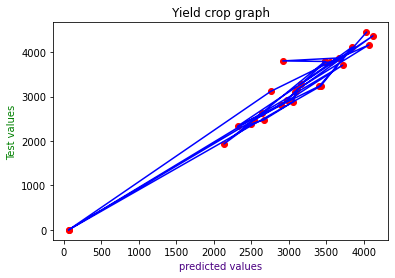

In [ ]:
plt.scatter(y_pred, y_test, color = 'red')
plt.plot(y_pred, y_test, color = 'blue')
plt.title('Yield crop graph')
plt.xlabel('predicted values',color = 'indigo')
plt.ylabel('Test values',color = 'green')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


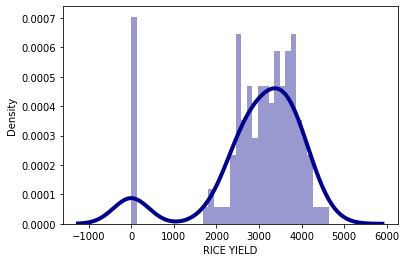

In [ ]:
import seaborn as sns
sns.distplot(fs['RICE YIELD'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 4})

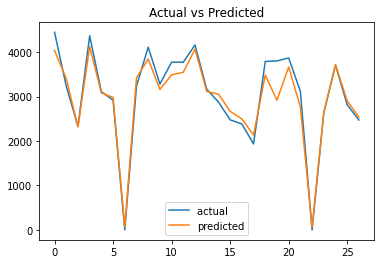

In [ ]:
dm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
b=plt.show()
b

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ac5843b90>,
      dtype=object)

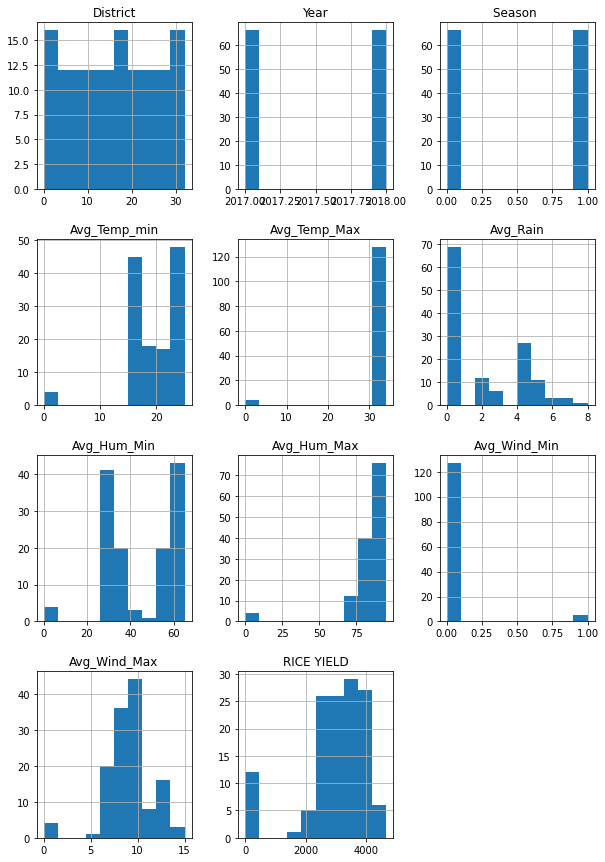

In [73]:
fs.hist(figsize = (10,15))


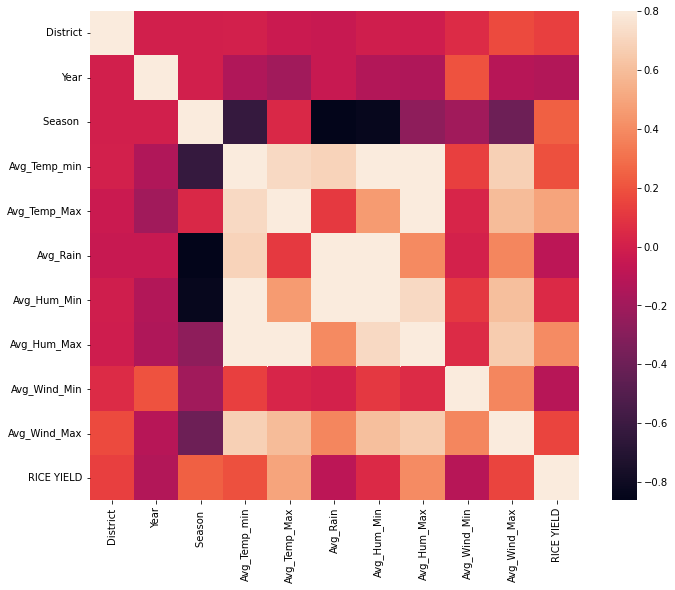

In [ ]:
corrmat = fs.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

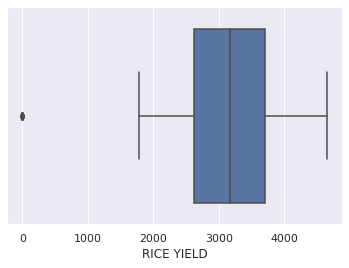

In [ ]:
sns.boxplot(x=fs['RICE YIELD'])